---
# 1. Description of the dataset
---
> Data set link : https://cseweb.ucsd.edu/~jmcauley/datasets.html#social_data. </br>
> We are provided with the following dataset: </br>
>  LibraryThing 


###  *Description of review dataset*

>* comment: The review or comment left by the user. 
>* nhelpful: The number of helpful votes received for the review.
>* unixtime: A timestamp indicating when the review was posted.
>* work: An identifier for the work being reviewed.
>* user: Name of the user who wrote the review.
>* stars: A numerical value representing the rating given in the review, on a scale of 0 to 5. 
>* time: The date when the review was posted.
>* user_id - An identifier of the user who wrote the review.

### *Importing the necessary libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore') 

C:\Users\aasma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### *Importing the dataset*

In [2]:
reviews = pd.read_csv('cleaned_review.csv')
reviews

,Unnamed: 0,comment,nhelpful,unixtime,work,user,stars,time,user_id
0,0,Every eveningthe brave queen of PersiaShahraza...,0,1332288000,73960,Elizabeth.Wong98,4.5,Mar 212012,0
1,1,Its the 1983-84 school year and Edward Zanni o...,0,1253404800,69413,rivkat,3.0,Sep 202009,1
2,2,I became privy to this bookwhen another author...,0,1299888000,9523995,suz.haugland,4.0,Mar 122011,2
3,3,.,0,1327276800,368228,amoskovacs,4.0,Jan 232012,3
4,4,This is a tremendous story of a freed woman an...,0,1329004800,11243828,CandyH,4.0,Feb 122012,4
...,...,...,...,...,...,...,...,...,...
1635945,1707065,This is quite possibly the cutest kids book I\...,0,1327795200,129503,evementen,NaN,Jan 292012,29587
1635946,1707066,This is a fairy tale which is very much a Cupi...,0,1364688000,11749693,AmyMacEvilly,5.0,Mar 312013,15112
1635947,1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1176681600,4873693,tamaranth,4.5,Apr 162007,1153
1635948,1707068,Despus del extraordinario xito de Los ojos ama...,0,1321920000,9705446,bibliosa,NaN,Nov 222011,15


---
# 2. Pre- Processing and Feature Extraction
---

In [22]:
# Reading the txt file
data = pd.read_csv('reviews.txt', delimiter='\t')
data

,reviews = {}
0,"reviews[('73960', 'Elizabeth.Wong98')] = {'com..."
1,"reviews[('69413', 'rivkat')] = {'comment': 'It..."
2,"reviews[('9523995', 'suz.haugland')] = {'comme..."
3,"reviews[('368228', 'amoskovacs')] = {'comment'..."
4,"reviews[('11243828', 'CandyH')] = {'comment': ..."
...,...
1707065,"reviews[('129503', 'evementen')] = {'comment':..."
1707066,"reviews[('11749693', 'AmyMacEvilly')] = {'comm..."
1707067,"reviews[('4873693', 'tamaranth')] = {'comment'..."
1707068,"reviews[('9705446', 'bibliosa')] = {'comment':..."


In [23]:
# Copying the data from reviews column to a new column named 'cleaned_review' and cleaning the reviews text

data['cleaned_review'] = data['reviews = {}'].apply(lambda x: x.split(']', 1)[1][3:])

rows = []
bad_chars = ['{', '}', "'", '"']
features = ['comment', 'nhelpful', 'unixtime', 'work', 'flags', 'user', 'stars', 'time']
int_value_features = ['nhelpful', 'unixtime', 'work']
def preprocess_data(content):
    prevs = ''
    dict = {}
    
    split_val = content.split(',')
    
    for i in range(len(split_val)):
        i_clean = ''.join(c for c in split_val[i] if not c in bad_chars)
        vals = i_clean.split(':', 1)

        vals = [val.lstrip() for val in vals]
        
        if len(vals) == 1:
            dict[prevs] += vals[0]

        else:
            if not vals[0] in features:
                dict[prevs] = dict.get(prevs, '') + vals[0]

            else:
                prevs = vals[0]
                dict[prevs] = ''

            dict[prevs] = dict.get(prevs, '') + vals[1]

    rows.append(dict)

data['cleaned_review'].apply(lambda x: preprocess_data(x))

0          None
1          None
2          None
3          None
4          None
           ... 
1707065    None
1707066    None
1707067    None
1707068    None
1707069    None
Name: cleaned_review, Length: 1707070, dtype: object

In [24]:
# Creating a DataFrame from the dictionary, 'columns' orient implies that keys are columns and values are lists of column data.
reviews = pd.DataFrame.from_dict(rows, orient='columns')
reviews 

,comment,nhelpful,unixtime,work,flags,user,stars,time,
0,Every eveningthe brave queen of PersiaShahraza...,0,1332288000,73960,[],Elizabeth.Wong98,4.5,Mar 212012,NaN
1,Its the 1983-84 school year and Edward Zanni o...,0,1253404800,69413,[],rivkat,3.0,Sep 202009,NaN
2,I became privy to this bookwhen another author...,0,1299888000,9523995,[],suz.haugland,4.0,Mar 122011,NaN
3,.,0,1327276800,368228,[],amoskovacs,4.0,Jan 232012,NaN
4,This is a tremendous story of a freed woman an...,0,1329004800,11243828,[],CandyH,4.0,Feb 122012,NaN
...,...,...,...,...,...,...,...,...,...
1707065,This is quite possibly the cutest kids book I\...,0,1327795200,129503,[],evementen,NaN,Jan 292012,NaN
1707066,This is a fairy tale which is very much a Cupi...,0,1364688000,11749693,[],AmyMacEvilly,5.0,Mar 312013,NaN
1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1176681600,4873693,[],tamaranth,4.5,Apr 162007,NaN
1707068,Despus del extraordinario xito de Los ojos ama...,0,1321920000,9705446,[],bibliosa,NaN,Nov 222011,NaN


In [33]:
# Assigning unique user-ids to the users

user_id_dict = {}
cnt = 0
def set_user_id(user):
    global cnt
    if not user in user_id_dict:
        user_id_dict[user] = cnt
        cnt += 1

    return user_id_dict[user]

reviews['user_id'] = reviews['user'].apply(lambda x: set_user_id(x))
reviews

,comment,nhelpful,unixtime,work,user,stars,time,,user_id
0,Every eveningthe brave queen of PersiaShahraza...,0,1332288000,73960,Elizabeth.Wong98,4.5,Mar 212012,NaN,0
1,Its the 1983-84 school year and Edward Zanni o...,0,1253404800,69413,rivkat,3.0,Sep 202009,NaN,1
2,I became privy to this bookwhen another author...,0,1299888000,9523995,suz.haugland,4.0,Mar 122011,NaN,2
3,.,0,1327276800,368228,amoskovacs,4.0,Jan 232012,NaN,3
4,This is a tremendous story of a freed woman an...,0,1329004800,11243828,CandyH,4.0,Feb 122012,NaN,4
...,...,...,...,...,...,...,...,...,...
1707065,This is quite possibly the cutest kids book I\...,0,1327795200,129503,evementen,NaN,Jan 292012,NaN,28814
1707066,This is a fairy tale which is very much a Cupi...,0,1364688000,11749693,AmyMacEvilly,5.0,Mar 312013,NaN,14706
1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1176681600,4873693,tamaranth,4.5,Apr 162007,NaN,1114
1707068,Despus del extraordinario xito de Los ojos ama...,0,1321920000,9705446,bibliosa,NaN,Nov 222011,NaN,15


In [28]:
# Dropping the 'flags' column from the dataFrame
reviews = reviews.drop(['flags'], axis=1)
reviews

In [31]:
# Saving the dataFrame to a CSV file
reviews.to_csv('../data/cleaned_review.csv')

In [4]:
# Checking for missing values in the DataFrame.
reviews.isnull().sum()

Unnamed: 0         0
comment          817
nhelpful           0
unixtime           0
work               0
user              87
stars         272458
time               0
user_id            0
dtype: int64

> Findings
> - Comments for 817 reviews are not available.
> - User names for 87 reviews are not available.
> - Stars for 272,458 reviews are not available.

> Let's remove reviews with missing information about stars


In [5]:
# Drops the rows(reviews) where the 'stars' column has missing values
reviews = reviews.dropna(subset=['stars'])

---
# 3. Exploratary Data Analysis to understand the data
---

In [5]:
reviews.shape

(1635950, 9)

- This indicates that the DataFrame contains information about 1635950 reviews (rows) and 9 attributes of each review (columns).

In [6]:
# Provides the list of column names
reviews.columns

Index(['Unnamed: 0', 'comment', 'nhelpful', 'unixtime', 'work', 'user',
       'stars', 'time', 'user_id'],
      dtype='object')

In [9]:
# Extracts number of unique books
unique_books = reviews['work'].unique() 
print("Number of books = " ,len(unique_books))

Number of books =  482300


In [10]:
# Extracts number of unique users
unique_users = reviews['user'].unique() 
print("Number of users = " ,len(unique_users))

Number of users =  81256


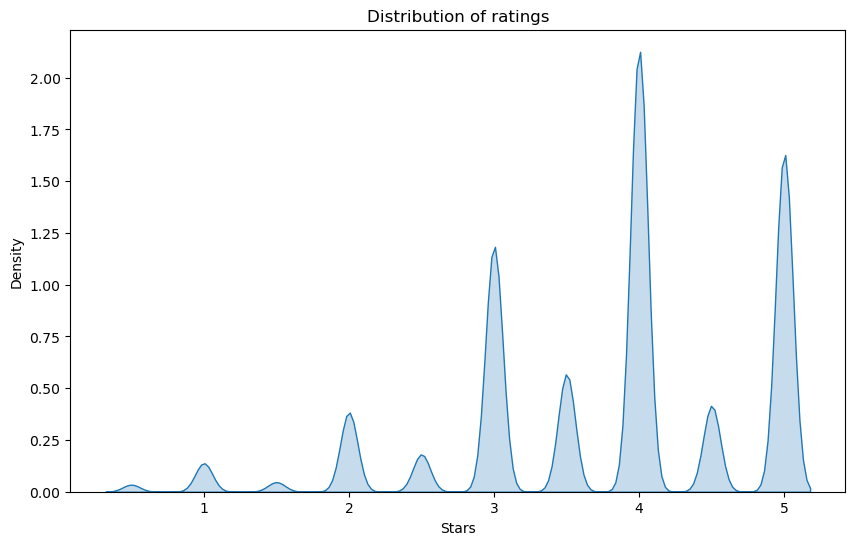

In [53]:
# Plot showing distribution of stars
plt.figure(figsize=(10, 6))
sns.kdeplot(reviews['stars'], shade=True)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.title('Distribution of ratings')
plt.show()

Findings:
- Most data points cluster around higher star ratings (around 4 stars). This suggests that many products receive positive ratings.

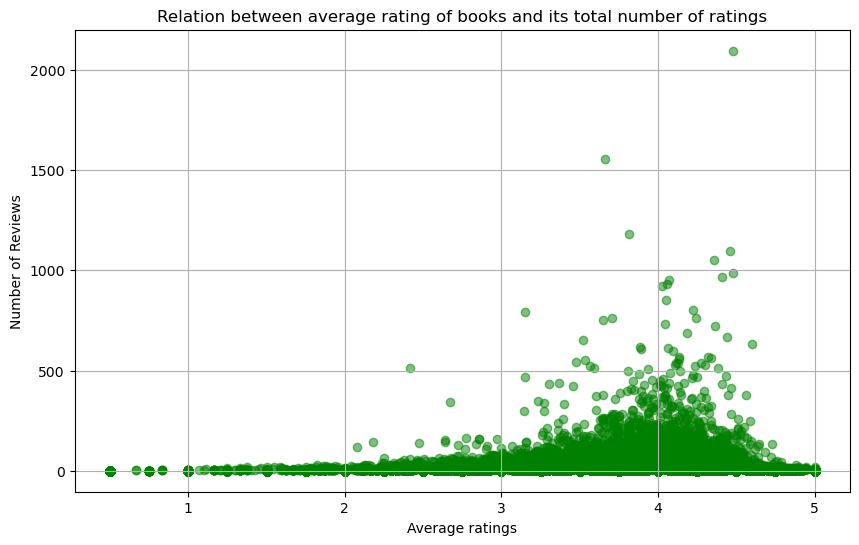

In [55]:
# Scatter plot to show the relationship between average number of ratings for a particular book
# with respect to the total number of ratings for that book

work_stats = reviews.groupby('work').agg({'stars': ['mean', 'count']}).reset_index()
work_stats.columns = ['work', 'avg_star', 'num_reviews']

plt.figure(figsize=(10, 6))
plt.scatter(work_stats['avg_star'], work_stats['num_reviews'], alpha=0.5, color='green')
plt.title('Relation between average rating of books and its total number of ratings')
plt.xlabel('Average ratings')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

Findings:
- There is not much linear relationship between average star rating and the number of reviews. Some highly rated products have a low number of reviews, while others with similar ratings have more reviews.

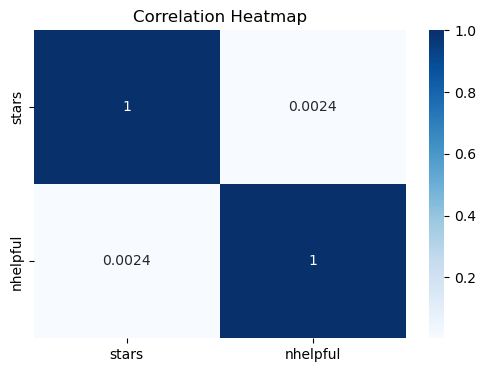

In [35]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(reviews[['stars', 'nhelpful']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

---
# 4. Webscrapping to get names of the book
---

In [56]:
def get_book_name(work_id):
    work_id = str(work_id)
    url = f'https://www.librarything.com/work/{work_id}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract the book name from the webpage
        book_name_tag = soup.head.title
        if book_name_tag:
            book_name = book_name_tag.text.strip()
            return book_name[:-15]
        else:
            return f"Book name not found for work ID {work_id}"

    else:
        return f"Failed to retrieve information for work ID {work_id}. Status code: {response.status_code}"

---
# 5. User - User Collabrative Filtering
---

In [57]:
# result_df = pd.read_parquet('result_df.parquet') 
# normalized_ratings_matrix = pd.read_parquet('normalized_ratings_matrix.parquet')
# similarity_matrix = pd.read_parquet('similarity_matrix.parquet')
# result_df_i = pd.read_parquet('result_df_i-i.parquet')
# normalized_ratings_matrix_i = pd.read_parquet('normalized_ratings_matrix_i-i.parquet')
# similarity_matrix_i = pd.read_parquet('similarity_matrix_i-i.parquet')

> Printing the average reviews provided by each user in order to remove some users, considering that the size of the data set is too large to process.

In [57]:
print(reviews.groupby('user').size().mean())

19.580784144765186


In [58]:
min_reviews_threshold = 20
user_review_counts = reviews.groupby('user_id').size()
valid_users = list(set(user_review_counts[user_review_counts >= min_reviews_threshold].index))
len(valid_users)

12076

> Removing the book_ids(works) that have an below-average number of reviews, considering that the size of the data set is too large to process.

In [56]:
min_reviews_threshold = reviews.groupby('work').size().mean()
user_review_counts = reviews.groupby('work').size()
valid_work = list(set(user_review_counts[user_review_counts >= min_reviews_threshold].index))
len(valid_work)

63681

> Creating new dataframe with filtered users and book_ids(work)

In [61]:
filtered_df = reviews[reviews.user_id.isin(valid_users)]
filtered_df = filtered_df[filtered_df.work.isin(valid_work)]

In [66]:
# User-Item matrix
result_df = pd.pivot_table(filtered_df, values='stars', index='user_id', columns='work', aggfunc='mean')

In [15]:
result_df

work,17,26,39,42,93,95,97,98,102,107,...,14135445,14139624,14143332,14145440,14150364,14150628,14151863,14171927,14183985,14184045
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- This is the user-item matrix with 12028 user and 63593 items.

In [26]:
result_df.describe()

work,17,26,39,42,93,95,97,98,102,107,...,14135445,14139624,14143332,14145440,14150364,14150628,14151863,14171927,14183985,14184045
count,21.000000,15.000000,47.000000,12.000000,5.000000,20.000000,6.000000,7.000000,13.0,20.00000,...,5.000000,5.0,3.000000,1.0,16.00000,3.000000,4.000000,4.00,4.0,18.000000
mean,3.809524,3.100000,4.234043,3.875000,4.000000,4.100000,4.250000,4.571429,4.5,4.10000,...,4.900000,5.0,3.333333,3.0,3.90625,3.500000,3.750000,4.75,5.0,4.361111
std,1.005935,0.948683,0.877565,0.742386,0.935414,0.575829,0.612372,0.534522,0.5,0.66094,...,0.223607,0.0,0.577350,NaN,0.82095,2.598076,0.288675,0.50,0.0,0.763228
min,2.000000,0.500000,1.000000,3.000000,3.000000,3.000000,3.500000,4.000000,4.0,3.00000,...,4.500000,5.0,3.000000,3.0,2.50000,0.500000,3.500000,4.00,5.0,3.000000
25%,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.0,3.87500,...,5.000000,5.0,3.000000,3.0,3.37500,2.750000,3.500000,4.75,5.0,4.000000
50%,4.000000,3.000000,4.000000,4.000000,4.500000,4.000000,4.000000,5.000000,4.5,4.00000,...,5.000000,5.0,3.000000,3.0,4.00000,5.000000,3.750000,5.00,5.0,4.750000
75%,5.000000,3.250000,5.000000,4.125000,4.500000,4.500000,4.750000,5.000000,5.0,4.50000,...,5.000000,5.0,3.500000,3.0,4.62500,5.000000,4.000000,5.00,5.0,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.00000,...,5.000000,5.0,4.000000,3.0,5.00000,5.000000,4.000000,5.00,5.0,5.000000


> Normalizing the rating by subtracting the mean of those users.

In [16]:
normalized_ratings_matrix = result_df.subtract(result_df.mean(axis=1), axis=0)
normalized_ratings_matrix

,17,26,39,42,93,95,97,98,102,107,...,14135445,14139624,14143332,14145440,14150364,14150628,14151863,14171927,14183985,14184045
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Calculating a similarity matrix using pearson's correlation for every user. 

In [17]:
similarity_matrix = result_df.T.corr()
similarity_matrix

,0,1,2,3,4,5,6,7,8,10,...,48512,48587,48949,48997,49380,49671,49832,50517,53295,54331
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,1.0,0.500427,NaN,0.872872,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,0.312019,NaN,NaN,NaN,-0.261899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,1.0,0.676481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49671,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
49832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
50517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


> Finding the mean rating for each user so, we can use this value as the user's average rating when generating queries.

In [19]:
user_means = result_df.mean(axis=1)
user_means

user_id
0        4.350000
1        3.299731
2        4.350000
3        3.248614
4        3.588462
           ...   
49671    2.777778
49832    4.357143
50517    3.727273
53295    4.076923
54331    4.000000
Length: 12028, dtype: float64

> Function that calculates a predicted rating for a given user (u) and item (i)

In [20]:
def calculate_score(u, i):
    if i not in result_df.columns:
        return 2.5

    if u not in similarity_matrix.index:
        return 2.5

    similarity_scores = similarity_matrix[str(u)].drop(index=u, errors='ignore')
    normalized_ratings = normalized_ratings_matrix[str(i)].drop(index=u, errors='ignore')
    normalized_ratings.dropna(inplace=True)
    similarity_scores.dropna(inplace=True)
    common_users = normalized_ratings.index.intersection(similarity_scores.index)

    
    similarity_scores = similarity_scores.loc[common_users]
    normalized_ratings = normalized_ratings.loc[common_users]
    if similarity_scores.empty or normalized_ratings.empty :
        return 2.5

    total_score = (normalized_ratings * similarity_scores).sum().sum()
    total_weight = np.sum(np.abs(similarity_scores))
    if total_weight == 0:
        return 2.5

    avg_user_rating = user_means.loc[u]
    return avg_user_rating + (total_score / total_weight)

> Testing the system's performance on a random sample of 1000 ratings from the dataset and evaluating its accuracy using the root mean squared error (RMSE) metric.

In [21]:
test = filtered_df.sample(1000)
test_ratings = np.array(test["stars"])
user_item_pairs = zip(test["user_id"], test["work"])
pred_ratings = np.array([calculate_score(user_id, work) for (user_id, work) in user_item_pairs])
print(np.sqrt(mean_squared_error(test_ratings, pred_ratings)))

0.7727548587004954


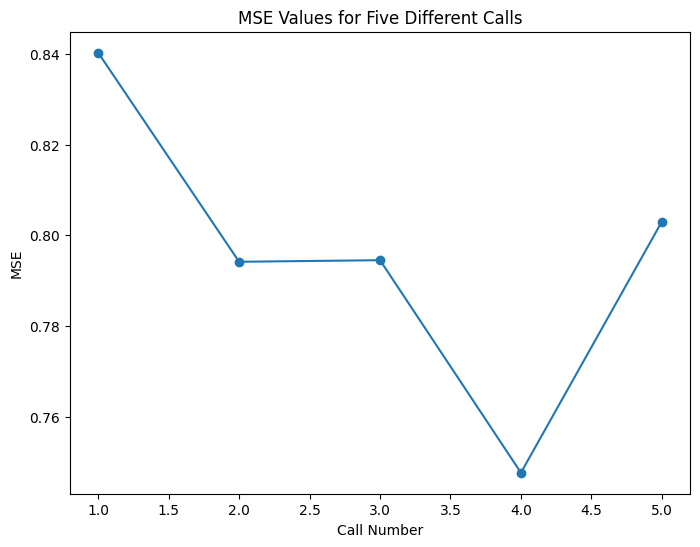

Call 1 - MSE: 0.8403
Call 2 - MSE: 0.7942
Call 3 - MSE: 0.7945
Call 4 - MSE: 0.7476
Call 5 - MSE: 0.8030


In [22]:
# Plot
num_calls = 5
mse_values = []
for call_num in range(num_calls):
    test = filtered_df.sample(1000)
    test_ratings = np.array(test["stars"])
    user_item_pairs = zip(test["user_id"], test["work"])
    pred_ratings = np.array([calculate_score(user_id, work) for (user_id, work) in user_item_pairs])

    mse = np.sqrt(mean_squared_error(test_ratings, pred_ratings))
    mse_values.append(mse)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_calls + 1), mse_values, marker='o')
plt.title('MSE Values for Five Different Calls')
plt.xlabel('Call Number')
plt.ylabel('MSE')
plt.show()

for call_num, mse in enumerate(mse_values):
    print(f'Call {call_num + 1} - MSE: {mse:.4f}')

#### Recommendation function.

In [24]:
def get_popular_items(num_items=5):
    work_stats = filtered_df.groupby('work')['stars'].agg(['mean', 'count'])
    
    work_stats['popularity_score'] = 0.5 * work_stats['mean'] + 0.5 * (work_stats['count'] / work_stats['count'].max())
    
    popular_works = work_stats.sort_values(by='popularity_score', ascending=False).head(num_items)
    return pd.DataFrame({'work': popular_works.index})

def get_seated_works(user_id, num_recommendations=5):
    user_id = int(user_id)
    if user_id not in filtered_df['user_id'].unique():
        popular_works = get_popular_items(num_recommendations)
        popular_works['book_name'] = popular_works['work'].apply(get_book_name)
        return popular_works[['work', 'book_name']].to_dict(orient='records')
    user_rated_works = filtered_df[filtered_df['user_id'] == user_id]['work'].unique()
    all_works = filtered_df['work'].unique()
    works_to_recommend = set(all_works) - set(user_rated_works)
    pred_ratings = [calculate_score(user_id, work) for work in works_to_recommend]
    recommendations_df = pd.DataFrame({'work': list(works_to_recommend), 'predicted_rating': pred_ratings})
    recommendations_df = recommendations_df.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = recommendations_df.head(num_recommendations)
    top_recommendations['book_name'] = top_recommendations['work'].apply(get_book_name)

    return top_recommendations[['work', 'book_name']].to_dict(orient='records')

In [26]:
get_seated_works(9)

[{'work': 4979986,
  'book_name': 'The Hunger Games by Suzanne Collins | LibraryThing'},
 {'work': 393681,
  'book_name': 'The Book Thief by Markus Zusak | LibraryThing'},
 {'work': 12698221,
  'book_name': 'A Luminous Future: Growing up in Transylvania in the Shadow of Communism by Teodor Flonta | LibraryThing'},
 {'work': 46079,
  'book_name': 'The Valley of Vision: A Collection of Puritan Prayers & Devotions by Arthur Bennett | LibraryThing'},
 {'work': 13110141,
  'book_name': 'A Conscious Void by Nathan Hassall | LibraryThing'}]

#### Running on local-host using Tkinter

In [36]:
import tkinter as tk
from tkinter import Text
from tkintermapview import TkinterMapView

from tkinterhtml import HtmlFrame
from tkintermapview import TkinterMapView
from here_map_widget import Map, Marker, GeoJSON, Icon

class Recommendation:
    def __init__(self, root, recommendation_model):
        self.root = root
        self.root.title("Recommendation System")
        self.recommendation_model = recommendation_model

        # User ID Input
        self.user_id_label = tk.Label(root, text="Enter User ID:")
        self.user_id_label.pack()
        self.user_id_entry = tk.Entry(root)
        self.user_id_entry.pack()

        # Button to trigger recommendations
        self.recommend_button = tk.Button(root, text="Get Recommendations", command=self.get_recommendations)
        self.recommend_button.pack()

        # Output Area
        self.output_label = tk.Label(root, text="Recommendations:")
        self.output_label.pack()
        self.output_text = Text(root, height=10, width=50)
        self.output_text.pack()

    def get_recommendations(self):
        user_id = self.user_id_entry.get()

        # Placeholder function for recommendation model
        r_d = get_seated_works(user_id)
        print('rd is', r_d)
        # Display recommendations
        self.output_text.delete(1.0, tk.END)
        r_d = pd.DataFrame(r_d, columns=['work'])
        # Check if re_df is available and display it
        self.output_text.insert(tk.END, r_d)


    def recommendation_model(user_id, search_query):
        f_d = None  # DataFrame of recommendations
        r_d = None  # Some other recommendation data
        recommendations_map = None  # Map data
    
        f_d, r_d, recommendations_map = reco(user_id,search_query)
        return f_d, r_d, recommendations_map

def main():
    recommendation_model = None

    root = tk.Tk()
    app = Recommendation(root, recommendation_model)
    root.mainloop()

if __name__ == "__main__":
    main()

rd is [55116, 13436973, 8187182, 13087756, 3563994]


---
# 6. Item - Item Collabrative Filtering
---

> Filtering the data considering that the size of the data set is too large to process.

In [28]:
user_review_counts = df.groupby('work').size()
valid_work = list(set(user_review_counts[user_review_counts >= 10].index))
len(valid_work)

23705

In [29]:
user_review_counts = df.groupby('user_id').size()
valid_users = list(set(user_review_counts[user_review_counts >= 20].index))
len(valid_users)

12076

> Creating new dataframe with filtered users and book_ids(work)

In [30]:
filtered_df_i = df[df.user_id.isin(valid_users)]
filtered_df_i = filtered_df[filtered_df.work.isin(valid_work)]

In [51]:
result_df_i = pd.pivot_table(filtered_df, values='stars', index='work', columns='user_id', aggfunc='mean')

In [31]:
result_df_i

user_id,0,1,2,3,4,5,6,7,8,10,...,48512,48587,48949,48997,49380,49671,49832,50517,53295,54331
work,,,,,,,,,,,,,,,,,,,,,
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14038411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14059398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14059400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- This is the user-item matrix with 23695 user and 11936 items.

> Normalizing the ratings

In [32]:
normalized_ratings_matrix_i = result_df_i.subtract(result_df_i.mean(axis=1), axis=0)
normalized_ratings_matrix_i

user_id,0,1,2,3,4,5,6,7,8,10,...,48512,48587,48949,48997,49380,49671,49832,50517,53295,54331
work,,,,,,,,,,,,,,,,,,,,,
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14038411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14059398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14059400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Calculating a similarity matrix using pearson's correlation.

In [33]:
similarity_matrix_i = result_df.T.corr()
similarity_matrix_i

work,17,26,39,42,95,102,107,109,111,113,...,13916138,13992951,14027081,14032585,14036722,14038411,14059398,14059400,14150364,14184045
work,,,,,,,,,,,,,,,,,,,,,
17,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.894427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14038411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.065272,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
14059398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
14059400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


> Finding the mean ratings

In [41]:
item_means = result_df_i.mean(axis=1)
item_means

work
17          3.809524
26          3.100000
39          4.234043
42          3.875000
95          4.100000
              ...   
14038411    4.016854
14059398    3.642857
14059400    3.421053
14150364    3.906250
14184045    4.361111
Length: 23695, dtype: float64

> Function that calculates a predicted rating for a given user (u) and item (i)

In [42]:
result_df_i_T = result_df_i.T

In [43]:
def calculate_score_i(u, i):
    if u not in result_df_i_T.index:
        return 2.5
    
    if i not in normalized_ratings_matrix_i.index:
        return 2.5

    
    similarity_scores = similarity_matrix_i[i].drop(index=i, errors='ignore')
    normalized_ratings = normalized_ratings_matrix_i[u].drop(index=i, errors='ignore')
    normalized_ratings.dropna(inplace=True)
    similarity_scores.dropna(inplace=True)
    common_users = normalized_ratings.index.intersection(similarity_scores.index)


    similarity_scores = similarity_scores.loc[common_users]
    normalized_ratings = normalized_ratings.loc[common_users]

    if similarity_scores.empty or normalized_ratings.empty:
        return 2.5
    total_score = (normalized_ratings * similarity_scores).sum().sum()
    total_weight = np.sum(np.abs(similarity_scores))
    if total_weight == 0:
        return 2.5

    avg_item_rating = item_means.loc[i]
    return avg_item_rating + (total_score / total_weight)

In [44]:
calculate_score_i(3,17)

4.094634312313114

> Testing the system's performance on a random sample of 1000 ratings from the dataset and evaluating its accuracy using the root mean squared error (RMSE) metric.

In [45]:
test = filtered_df_i.sample(1000)
test_ratings = np.array(test["stars"])
user_item_pairs = zip(test["user_id"], test["work"])
pred_ratings = np.array([calculate_score_i(user_id, work) for (user_id, work) in user_item_pairs])
print(np.sqrt(mean_squared_error(test_ratings, pred_ratings)))

0.6091620128385276


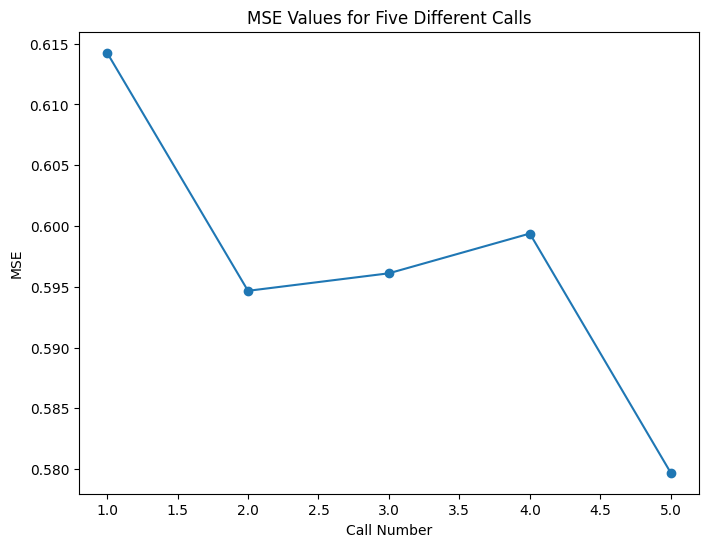

Call 1 - MSE: 0.6143
Call 2 - MSE: 0.5947
Call 3 - MSE: 0.5961
Call 4 - MSE: 0.5994
Call 5 - MSE: 0.5797


In [46]:
#plot
num_calls = 5
mse_values = []
for call_num in range(num_calls):
    test = filtered_df_i.sample(1000)
    test_ratings = np.array(test["stars"])
    user_item_pairs = zip(test["user_id"], test["work"])
    pred_ratings = np.array([calculate_score_i(user_id, work) for (user_id, work) in user_item_pairs])

    mse = np.sqrt(mean_squared_error(test_ratings, pred_ratings))
    mse_values.append(mse)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_calls + 1), mse_values, marker='o')
plt.title('MSE Values for Five Different Calls')
plt.xlabel('Call Number')
plt.ylabel('MSE')
plt.show()

for call_num, mse in enumerate(mse_values):
    print(f'Call {call_num + 1} - MSE: {mse:.4f}')

#### Recommendation function.

In [47]:
def get_book_name(work_id):
    work_id = str(work_id)
    url = f'https://www.librarything.com/work/{work_id}'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract the book name from the webpage
        book_name_tag = soup.head.title
        if book_name_tag:
            book_name = book_name_tag.text.strip()
            return book_name[:-15]
        else:
            return f"Book name not found for work ID {work_id}"

    else:
        return f"Failed to retrieve information for work ID {work_id}. Status code: {response.status_code}"
def get_popular_items(num_items=5):
    work_stats = filtered_df_i.groupby('work')['stars'].agg(['mean', 'count'])
    
    work_stats['popularity_score'] = 0.5 * work_stats['mean'] + 0.5 * (work_stats['count'] / work_stats['count'].max())
    
    popular_works = work_stats.sort_values(by='popularity_score', ascending=False).head(num_items)
    return pd.DataFrame({'work': popular_works.index})
def get_seated_works_i(user_id, num_recommendations=5):
    user_id = int(user_id)
    if user_id not in filtered_df_i['user_id'].unique():
        popular_works = get_popular_items(num_recommendations)
        popular_works['book_name'] = popular_works['work'].apply(get_book_name)
        return popular_works[['work', 'book_name']].to_dict(orient='records')
    user_rated_works = filtered_df_i[filtered_df_i['user_id'] == user_id][['work', 'stars']]
    all_works = filtered_df_i['work'].unique()
    works_to_recommend = set(all_works) - set(user_rated_works['work'])
    pred_ratings = [calculate_score_i(user_id, work) for work in works_to_recommend]
    recommendations_df = pd.DataFrame({'work': list(works_to_recommend), 'predicted_rating': pred_ratings})
    recommendations_df = recommendations_df.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = recommendations_df.head(num_recommendations)
    # Retrieve book names for recommended works
    top_recommendations['book_name'] = top_recommendations['work'].apply(get_book_name)

    return top_recommendations[['work', 'book_name']].to_dict(orient='records')

In [48]:
get_seated_works_i(9)

[{'work': 4979986, 'book_name': 'The Hunger Games by Suzanne Collins'},
 {'work': 393681, 'book_name': 'The Book Thief by Markus Zusak'},
 {'work': 12698221,
  'book_name': 'A Luminous Future: Growing up in Transylvania in the Shadow of Communism by Teodor Flonta'},
 {'work': 46079,
  'book_name': 'The Valley of Vision: A Collection of Puritan Prayers & Devotions by Arthur Bennett'},
 {'work': 3874,
  'book_name': 'Institutes of the Christian Religion by John Calvin'}]

#### Running on local-host using Tkinter

In [138]:
import tkinter as tk
from tkinter import Text
from tkintermapview import TkinterMapView

from tkinterhtml import HtmlFrame
from tkintermapview import TkinterMapView

class Recommendation:
    def __init__(self, root, recommendation_model):
        self.root = root
        self.root.title("Recommendation System")
        self.recommendation_model = recommendation_model

        # User ID Input
        self.user_id_label = tk.Label(root, text="Enter User ID:")
        self.user_id_label.pack()
        self.user_id_entry = tk.Entry(root)
        self.user_id_entry.pack()

        # Button to trigger recommendations
        self.recommend_button = tk.Button(root, text="Get Recommendations", command=self.get_recommendations)
        self.recommend_button.pack()

        # Output Area
        self.output_label = tk.Label(root, text="Recommendations:")
        self.output_label.pack()
        self.output_text = Text(root, height=50, width=100)
        self.output_text.pack()

    def get_recommendations(self):
        user_id = self.user_id_entry.get()

        # Placeholder function for recommendation model
        r_d = get_seated_works_i(user_id)
        print('rd is', r_d)
        # Display recommendations
        self.output_text.delete(1.0, tk.END)
        r_d = pd.DataFrame(r_d, columns=['work','book_name'])
        # Check if re_df is available and display it
        self.output_text.insert(tk.END, r_d)


    def recommendation_model(user_id, search_query):
        f_d = None  # DataFrame of recommendations
        r_d = None  # Some other recommendation data
        recommendations_map = None  # Map data
    
        f_d, r_d, recommendations_map = reco(user_id,search_query)
        return f_d, r_d, recommendations_map

def main():
    recommendation_model = None

    root = tk.Tk()
    app = Recommendation(root, recommendation_model)
    root.mainloop()

if __name__ == "__main__":
    main()


/var/folders/kr/f6pdywr55kjgnxhcg_n_j5jr0000gn/T/ipykernel_4441/708434916.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['book_name'] = top_recommendations['work'].apply(get_book_name)


rd is [{'work': 561832, 'book_name': 'Framed by Frank Cottrell Boyce | LibraryThing'}, {'work': 2419729, 'book_name': 'Red Mandarin Dress by Qiu Xiaolong | LibraryThing'}, {'work': 767021, 'book_name': "Mom's Cancer by Brian Fies | LibraryThing"}, {'work': 6166269, 'book_name': 'Before I Lose My Style by Mike Kaspar | LibraryThing'}, {'work': 1362542, 'book_name': 'Crusade in Jeans by Thea Beckman | LibraryThing'}]


---
# 7. Matrix Factorization
---

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
train = pd.read_csv('/kaggle/input/data-mf/Train_data.csv')
test = pd.read_csv('/kaggle/input/data-mf/Test_leave_one_out.csv')

In [22]:
n_latent_factors= 50
n_users = len(train['user_id'].unique())
n_books = len(train['work'].unique())

In [23]:
batch_size=32
epochs=50

In [26]:
from keras import saving
@saving.register_keras_serializable('My_layers')
class MF_Model(keras.Model):
    def __init__(self, n_users, n_books, n_latent_factors, dropout_rate= 0.3, **kwargs):
        super(MF_Model, self).__init__(**kwargs)

        self.n_users = n_users
        self.n_books = n_books
        self.n_latent_factors = n_latent_factors
        self.dropout_rate = dropout_rate

        self.user_embedding = keras.layers.Embedding(n_users, n_latent_factors, name='user_embedding')
        self.book_embedding = keras.layers.Embedding(n_books, n_latent_factors, name='book_embedding')


        self.user_flatten = keras.layers.Flatten(name='FlattenUsers')
        self.book_flatten = keras.layers.Flatten(name='FlattenBooks')

        self.dot_sim = keras.layers.Dot(axes=1, name='Similarity-Dot-Product')

    def call(self, inputs):
        user_input, book_input = inputs
        user_embedding = self.user_embedding(user_input)
        book_embedding = self.book_embedding(book_input)


        user_vec = self.user_flatten(user_embedding)
        book_vec = self.book_flatten(book_embedding)

        sim = self.dot_sim([user_vec, book_vec])

        return sim

    def get_config(self):
      config = super().get_config()
      config.update({
          'n_users': self.n_users,
          'n_books': self.n_books,
          'n_latent_factors': self.n_latent_factors,
          'dropout_rate': self.dropout_rate
      })

      return config



- In this method, we have used neural network to find out the latent matrix of the users and the books. We have used Embedding layer to predict the latent factor matrices.

In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("MF_model_Preyali.keras", save_best_only=True, monitor='val_loss')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

In [28]:
model = MF_Model(n_users, n_books, n_latent_factors)

In [29]:
model.compile(optimizer=tf.optimizers.Adam(), loss='mse', metrics=['mae', keras.metrics.R2Score()])

In [30]:
History = model.fit([train.user_id, train.work], train.stars, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb,lr_decay_cb], verbose=1)

Epoch 1/50
   33/15987 ━━━━━━━━━━━━━━━━━━━━ 1:16 5ms/step - loss: 15.3620 - mae: 3.7991 - r2_score: -15.6752

I0000 00:00:1709747970.586989     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15987/15987 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - loss: 14.2172 - mae: 3.6053 - r2_score: -14.2246 - val_loss: 5.6159 - val_mae: 1.9589 - val_r2_score: -4.9890 - learning_rate: 0.0010
Epoch 2/50
15987/15987 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 3.6735 - mae: 1.5089 - r2_score: -2.9122 - val_loss: 2.2050 - val_mae: 1.1123 - val_r2_score: -1.3513 - learning_rate: 0.0010
Epoch 3/50
15987/15987 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - loss: 1.2623 - mae: 0.8474 - r2_score: -0.3429 - val_loss: 1.5677 - val_mae: 0.9331 - val_r2_score: -0.6719 - learning_rate: 0.0010
Epoch 4/50
15987/15987 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - loss: 0.7883 - mae: 0.6740 - r2_score: 0.1570 - val_loss: 1.3973 - val_mae: 0.8868 - val_r2_score: -0.4902 - learning_rate: 0.0010
Epoch 5/50
15987/15987 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 0.5884 - mae: 0.5846 - r2_score: 0.3699 - val_loss: 1.3498 - val_mae: 0.8749 - val_r2_score: -0.4396 - learning_rate: 0.0010
Epoch 6/50
15987/15987 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step

In [31]:
import matplotlib.pyplot as plt

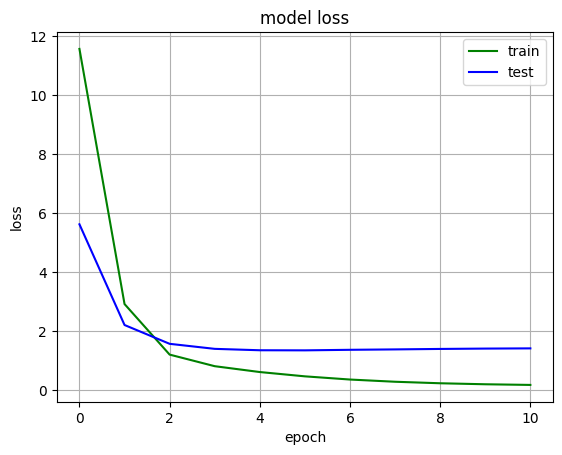

In [32]:
plt.plot(History.history['loss'], 'g')
plt.plot(History.history['val_loss'], 'b')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

- We can see the train and validation loss of the model.

In [35]:
model.predict([test.user_id, test.work])

989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[ 3.9923649e+00],
       [ 1.9760242e+00],
       [ 4.5244470e+00],
       ...,
       [-2.8233815e-02],
       [ 3.1641200e-03],
       [-1.1413104e-03]], dtype=float32)

In [37]:
model.evaluate([test.user_id, test.work], test.stars)

989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.5888 - mae: 2.6368 - r2_score: -7.8812


[12.972250938415527, 3.2604522705078125, -10.465714454650879]

- As we can see, the MSE of the training dataset is very high, so we have used another approach to predict the ratings.

In [38]:
np.sqrt(9.5888)

3.096578757273905

In [ ]:
def make_recommendations(df, user, model, k = 10):
    if not user in user2idx:
        return 'Please review more books to get recommendations'
    
    rated_books = df[df['user_id'] == user]['work']
    unrate_books = [i for i in books if i not in rated_books]
    unrated_books = pd.DataFrame()
    
    unrated_books['work'] = unrate_books
    
    unrated_books['work_id']= unrated_books['work'].apply(lambda x: book2idx[x] if x in book2idx else None)
    
    unrated_books = unrated_books.dropna()
    
    unrated_books['user_id'] = user2idx[user]
    unrated_books['original_user_id'] = user

    unrated_books['rating'] = model.predict([unrated_books['user_id'], unrated_books['work_id']], verbose=0)
    
    
    
        
    top_k = unrated_books.sort_values('rating', ascending=False).iloc[:k]
    avg_ratings = df[df['work'].isin(top_k['work_id'].tolist())][['work', 'avg_rating']]

    avg_ratings.drop_duplicates(subset='work', inplace=True)
    
    avg_ratings.rename(columns={'work': 'work_id'}, inplace=True)
    
    top_k = top_k.merge(avg_ratings, on='work_id', how='left')


    return top_k

---
# 8. Neural Network Collaborative Filtering
---

In [133]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
df = pd.read_csv('/kaggle/input/review/cleaned_review.csv')

In [4]:
df.head()

,Unnamed: 0,comment,nhelpful,unixtime,work,user,stars,time,user_id
0,0,Every eveningthe brave queen of PersiaShahraza...,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,Mar 212012,0
1,1,Its the 1983-84 school year and Edward Zanni o...,0,1.253405e+09,69413,rivkat,3.0,Sep 202009,1
2,2,I became privy to this bookwhen another author...,0,1.299888e+09,9523995,suz.haugland,4.0,Mar 122011,2
3,3,.,0,1.327277e+09,368228,amoskovacs,4.0,Jan 232012,3
4,4,This is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,CandyH,4.0,Feb 122012,4


In [5]:
df.shape

(1635950, 9)

In [6]:
df_2 = df[['user_id', 'work', 'stars']]

In [7]:
df_2.shape

(1635950, 3)

In [8]:
min_user_threshold = 20
min_book_threshold = 3.39

In [9]:
cnt_users = pd.DataFrame(df.groupby('user_id').size(), columns=['cnt'])
cnt_books = pd.DataFrame(df.groupby('work').size(), columns=['cnt'])

In [10]:
users = list(set(cnt_users.query('cnt >= @min_user_threshold').index))
books = list(set(cnt_books.query('cnt >= @min_book_threshold').index))

In [11]:
print(f'The number of users : {len(users)} and the number of books: {len(books)}')

The number of users : 14622 and the number of books: 73225


In [12]:
user_matrix = df[df.user_id.isin(users)]
matrix = user_matrix[user_matrix.work.isin(books)]

In [13]:
print(df.shape, matrix.shape)

(1635950, 9) (907014, 9)


In [14]:
matrix.isna().sum()

Unnamed: 0         0
comment          213
nhelpful           0
unixtime          78
work               0
user              79
stars         107702
time              78
user_id            0
dtype: int64

In [15]:
matrix = df_2.dropna(subset=['stars'])

In [16]:
users = matrix['user_id'].unique()
books = matrix['work'].unique()

In [17]:
print(f'Total unique users: {len(users)} & total unique books: {len(books)}')

Total unique users: 69631 & total unique books: 381378


In [18]:
user2idx = {o:i for i, o in enumerate(users)}
book2idx = {o:i for i, o in enumerate(books)}

In [132]:
matrix['user_id'] = matrix['user_id'].apply(lambda x: user2idx[x])
matrix['work'] = matrix['work'].apply(lambda x: book2idx[x])

In [19]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test_data.csv')

In [103]:
train, test = train_test_split(matrix[['user_id', 'work', 'stars']], test_size=0.2, random_state=42)

In [104]:
test.shape

(272699, 3)

In [105]:
test = test[test['user_id'].isin(train['user_id'].unique())]
test = test[test['work'].isin(train['work'].unique())]

In [106]:
test.shape

(214804, 3)

In [107]:
test_leave_one_out = test.groupby('user_id').last().reset_index()

In [108]:
test_rest = test[~test['work'].isin(test_leave_one_out['work'].unique())]

In [110]:
train_last = pd.concat([train, test_rest], ignore_index=True)

In [112]:
train_last.to_csv('Train.csv')
test_leave_one_out.to_csv('Test_leave_one_out.csv')
test.to_csv('Test_default.csv')

In [42]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_leave_one_out.csv')

In [22]:
n_latent_factors= 300
n_users = len(matrix['user_id'].unique())
n_books = len(matrix['work'].unique())

In [151]:
batch_size=48
epochs=50

In [20]:
from keras import saving

In [21]:
@saving.register_keras_serializable('my_package')
class MF_Neural_Net_Model(keras.Model):
    def __init__(self, n_users, n_books, n_latent_factors, reg = 0, dropout_rate=0.3, **kwargs):    
        super(MF_Neural_Net_Model, self).__init__(**kwargs)
        self.n_users = n_users
        self.n_books = n_books
        self.n_latent_factors = n_latent_factors
        self.reg = reg
        self.dropout_rate = dropout_rate

        self.user_embedding = keras.layers.Embedding(n_users, n_latent_factors, embeddings_regularizer=keras.regularizers.l2(reg), name='user_embedding')
        self.book_embedding = keras.layers.Embedding(n_books, n_latent_factors, embeddings_regularizer=keras.regularizers.l2(reg), name='book_embedding')
        
    
        self.user_flatten = keras.layers.Flatten(name='FlattenUsers')
        self.book_flatten = keras.layers.Flatten(name='FlattenBooks')
        
        
        self.user_dense_1 = keras.layers.Dense(96, activation='relu')
        self.user_dense_2 = keras.layers.Dense(48, activation='relu')
        self.book_dense_1 = keras.layers.Dense(96, activation='relu')
        self.book_dense_2 = keras.layers.Dense(48, activation='relu')
                                            
        
        self.user_dropout = keras.layers.Dropout(dropout_rate)
        self.book_dropout = keras.layers.Dropout(dropout_rate)
        self.dot_sim = keras.layers.Dot(axes=1, name='Similarity-Dot-Product')
            
        self.dense_1 = keras.layers.Dense(96, activation='relu')
        self.dense_2 = keras.layers.Dense(1, activation='relu')

    def call(self, inputs):
        user_input, book_input = inputs
        user_embedding = self.user_embedding(user_input)
        book_embedding = self.book_embedding(book_input)
        

        user_vec = self.user_flatten(user_embedding)
        user_vec = self.user_dense_1(user_vec)
        user_vec = self.user_dense_2(user_vec)

        book_vec = self.book_flatten(book_embedding)
        book_vec = self.book_dense_1(book_vec)
        book_vec = self.book_dense_2(book_vec)

      
        user_vec = self.user_dropout(user_vec)
        book_vec = self.book_dropout(book_vec)
        sim = self.dot_sim([user_vec, book_vec])

        nn_inp = self.dense_1(sim)
      
        output = self.dense_2(nn_inp)
        
        return output
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'n_users': self.n_users,
            'n_books': self.n_books,
            'n_latent_factors': self.n_latent_factors,
            'reg': self.reg,
            'dropout_rate': self.dropout_rate
        })
        return config

- As we can see here, we have used Dense layers to find out the complext relations between users and the books.
- Using this approach, we can improve the error of our model

In [147]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("MF_model_nn.keras", monitor='val_loss', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

In [152]:
model = MF_Neural_Net_Model(n_users, n_books, n_latent_factors)

In [153]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae', keras.metrics.R2Score()])

In [29]:
History = model.fit([train.user_id, train.work], train.stars, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[checkpoint_cb, lr_decay_cb, early_stopping_cb], verbose=1)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 114413400 elements. This may consume a large amount of memory.
  warnings.warn(


   10/19865 ━━━━━━━━━━━━━━━━━━━━ 6:11 19ms/step - loss: 15.1039 - mae: 3.7607 - r2_score: -14.8531

I0000 00:00:1709729336.636971     153 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19865/19865 ━━━━━━━━━━━━━━━━━━━━ 389s 19ms/step - loss: 1.1026 - mae: 0.7892 - r2_score: -0.1069 - val_loss: 0.7740 - val_mae: 0.6772 - val_r2_score: 0.2011 - learning_rate: 0.0010
Epoch 2/50
19865/19865 ━━━━━━━━━━━━━━━━━━━━ 375s 19ms/step - loss: 0.6255 - mae: 0.5950 - r2_score: 0.3726 - val_loss: 0.7958 - val_mae: 0.6849 - val_r2_score: 0.1786 - learning_rate: 0.0010
Epoch 3/50
19865/19865 ━━━━━━━━━━━━━━━━━━━━ 375s 19ms/step - loss: 0.5240 - mae: 0.5273 - r2_score: 0.4742 - val_loss: 0.8474 - val_mae: 0.6941 - val_r2_score: 0.1253 - learning_rate: 0.0010
Epoch 4/50
19865/19865 ━━━━━━━━━━━━━━━━━━━━ 374s 19ms/step - loss: 0.4472 - mae: 0.4744 - r2_score: 0.5505 - val_loss: 0.8547 - val_mae: 0.7112 - val_r2_score: 0.1177 - learning_rate: 0.0010
Epoch 5/50
19865/19865 ━━━━━━━━━━━━━━━━━━━━ 374s 19ms/step - loss: 0.3893 - mae: 0.4341 - r2_score: 0.6096 - val_loss: 0.9093 - val_mae: 0.7244 - val_r2_score: 0.0613 - learning_rate: 0.0010
Epoch 6/50
19865/19865 ━━━━━━━━━━━━━━━━━━━━ 374s 19ms/s

In [31]:
import matplotlib.pyplot as plt

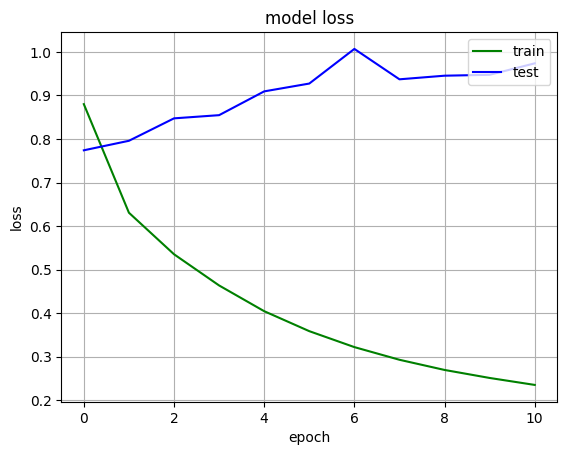

In [96]:
plt.plot(History.history['loss'], 'g')
plt.plot(History.history['val_loss'], 'b')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

In [44]:
tf.saved_model.save(model, export_dir='Final_model.tf')

In [39]:
model.predict([test_leave_one_out.user_id, test_leave_one_out.work])

390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.570698 ],
       [2.7514753],
       [3.6355681],
       ...,
       [2.9972973],
       [2.9722366],
       [3.1849334]], dtype=float32)

In [34]:
model.evaluate([test.user_id, test.work], test.stars)

4957/4957 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 1.1274 - mae: 0.8377 - r2_score: -0.1996


[1.124827265739441, 0.8363585472106934, -0.20190143585205078]

- As we can see, the MSE of the test dataset is 1.12, which is much lower than the conventional matrix factorization model.

In [22]:
model = saving.load_model('Final_model.keras')

In [56]:
idx2book = {i:b for b, i in book2idx.items()}

In [205]:
def make_recommendations(df, user, model, k = 10):
    if not user in user2idx:
        return 'Please review more books to get recommendations'
    
    rated_books = df[df['user_id'] == user]['work']
    unrate_books = [i for i in books if i not in rated_books]
    unrated_books = pd.DataFrame()
    
    unrated_books['work'] = unrate_books
    
    unrated_books['work_id']= unrated_books['work'].apply(lambda x: book2idx[x] if x in book2idx else None)
    
    unrated_books = unrated_books.dropna()
    
    unrated_books['user_id'] = user2idx[user]
    unrated_books['original_user_id'] = user

    unrated_books['rating'] = model.predict([unrated_books['user_id'], unrated_books['work_id']], verbose=0)
    
    
    
        
    top_k = unrated_books.sort_values('rating', ascending=False).iloc[:k]
    avg_ratings = df[df['work'].isin(top_k['work_id'].tolist())][['work', 'avg_rating']]

    avg_ratings.drop_duplicates(subset='work', inplace=True)
    
    avg_ratings.rename(columns={'work': 'work_id'}, inplace=True)
    
    top_k = top_k.merge(avg_ratings, on='work_id', how='left')


    return top_k

In [27]:
model.layers

[<Embedding name=user_embedding, built=True>,
 <Embedding name=book_embedding, built=True>,
 <Flatten name=FlattenUsers, built=True>,
 <Flatten name=FlattenBooks, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dropout name=dropout, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dot name=Similarity-Dot-Product, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [45]:
user_latent_matrix = model.layers[0].weights[0].numpy()
book_latent_matrix = model.layers[1].weights[0].numpy()

In [51]:
def cosine_similarity(i1, i2):
    b1 = book_latent_matrix[i1]
    b2 = book_latent_matrix[i2]
    return np.dot(b1, b2) / (np.linalg.norm(b1) * np.linalg.norm(b2))

In [147]:
average_ratings = matrix.groupby('work')['stars'].mean().reset_index()
average_ratings.rename(columns={'stars': 'avg_rating'}, inplace=True)

matrix = matrix.merge(average_ratings, on='work', how='left')

In [186]:
def get_best_diverse(items, ranking, pred_ratings, avg_ratings, reg):
    
    maxi = 0
    first = 0
    
    temp = ranking
    if len(ranking) == 0:
        temp = items
    
    for i in range(len(items)):
        score = 0
        for j in temp:
            if items[i] == j:
                continue
            score += 1 - cosine_similarity(items[i], j)

        f_score = ((1 - reg) *  (score / (len(items)-1))) + (reg * pred_ratings[i] / avg_ratings[i])
            
        if maxi < f_score:
            maxi = f_score
            first = i
            
    return first

- We have used the above function to improve diveristy in our model.

In [212]:
def diverse_recommendations(df, user, model, reg = 0.25, k = 10):
    top_k = make_recommendations(df, user, model, 100)
    
    if type(top_k) == 'str':
        return top_k
    
    ranking = []
    items = top_k['work_id'].tolist()
    pred_ratings = top_k['rating'].tolist()
    average_rating = top_k['avg_rating'].tolist()
    
    
    while len(ranking) < k:
        index = get_best_diverse(items, ranking, pred_ratings, average_rating, reg)
        ranking.append(items[index])
        del items[index]
    
    final_rankings = [idx2book[i] for i in ranking]
    
    return final_rankings
    

In [89]:
def cal_ILD(rankings):
    score = 0
    
    for i in rankings:
        for j in rankings:
            if i == j:
                continue
            
            score += 1 - cosine_similarity(book2idx[i], book2idx[j])
    
    return score / (len(rankings) * len(rankings) - 1)                

In [206]:
normal_rec = make_recommendations(matrix, 22, model, k=20)

In [213]:
diverse_rec = diverse_recommendations(matrix, 22, model, k = 20)

In [214]:
cal_ILD(normal_rec['work'].tolist())

0.33645838379561155

In [215]:
cal_ILD(diverse_rec)

0.45482085581710163

- As we can see above, by using diveristy approach, the diversity of the recommendation model is increased.